In [1]:
import sys
sys.path.append("../")
import torch
import torch.nn.functional as F
from colour.plotting import *
import numpy as np
import matplotlib.pyplot as plt
from datasets.cave_dataset import CAVEDataset

/data/shubham/tv_opt/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import cv2

In [3]:
dataset = CAVEDataset("../datasets/data/CAVE", None, mode="train")

In [4]:
lr_hsi, hr_msi, hr_hsi, max_vals = dataset[0]

In [5]:
Rmodel = torch.nn.Linear(3, 31, bias=False)
model_path = "../artifacts/R.pt"
Rmodel.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [11]:
Zc, N1, N2 = hr_msi.shape
Xreco = Rmodel(hr_msi.permute(1,2, 0).reshape(-1, Zc))

In [14]:
Xreco = Xreco.reshape(N1, N2, -1)

In [8]:
y, z, x = lr_hsi, hr_msi, hr_hsi

In [ ]:
cv2.resize(lr_hsi[band, :, :].detach().numpy()

In [ ]:
final_im = cv2.GaussianBlur(final_im,(25, 25),0)

In [13]:
Xreco.shape

torch.Size([262144, 31])

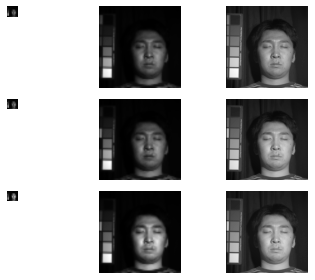

In [15]:
bands = [10, 15, 20]
f, axs = plt.subplots(3, 3, sharey=True)
for i, band in enumerate(bands):
    axs[i, 0].imshow(y[band, :, :].detach().numpy(), cmap="gray")
    axs[i, 0].axis("off")
    axs[i, 1].imshow(cv2.resize(lr_hsi[band, :, :].detach().numpy(), (512, 512), interpolation=cv2.INTER_LINEAR), cmap="gray")
    axs[i, 1].axis("off")
    axs[i, 2].imshow(Xreco[:, :, band].detach().numpy(), cmap="gray")
    axs[i, 2].axis("off")

plt.subplots_adjust(hspace=0, wspace=0)
plt.tight_layout()

In [8]:
def compose_rgb(ar):
    b = 6
    g = 16
    r = 25
    new_ar = torch.cat([ar[r][None, ...], ar[g][None, ...], ar[b][None, ...]], 0)
    return new_ar.permute(1, 2, 0)



In [11]:
Xreco_rgb = compose_rgb(Xreco.detach().permute(2, 0, 1)).numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


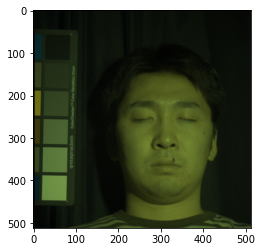

In [12]:
plt.imshow(Xreco_rgb)

In [13]:
lr_hsi_rgb = compose_rgb(lr_hsi).numpy()
hr_hsi_rgb = compose_rgb(hr_hsi).numpy()

In [14]:
hr_msi_rgb = cv2.cvtColor(hr_msi.permute(1, 2, 0).numpy(), cv2.COLOR_BGR2RGB)

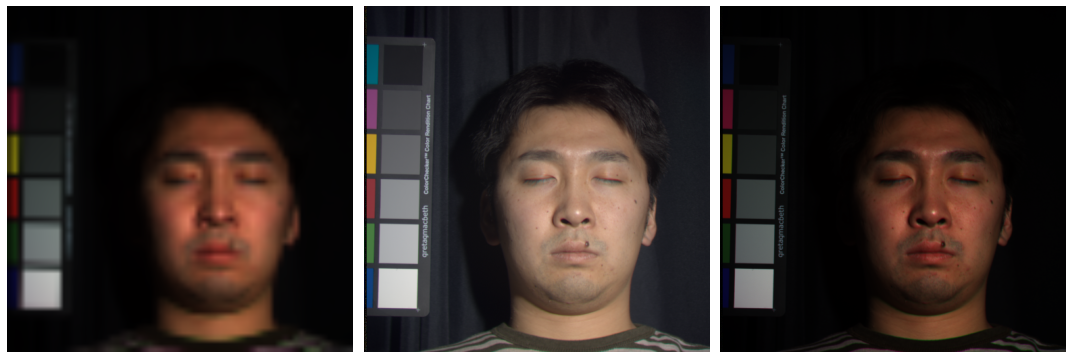

In [20]:
fig,ax = plt.subplots(1,3,figsize = (15,15))
ax[0].imshow(cv2.resize(lr_hsi_rgb, (512, 512), interpolation=cv2.INTER_LINEAR))
# ax[0].set_title("HSI") # [64, 64, 3]
ax[0].axis("off")
ax[1].imshow(hr_msi_rgb) 
# ax[1].set_title("MSI")
ax[1].axis("off")
ax[2].imshow(hr_hsi_rgb)
# ax[2].set_title("SRI")
ax[2].axis("off")
# ax.set_axis_off()
plt.tight_layout()